In [1]:
import cedalion
import cedalion.models.glm.basis_functions as bf
import cedalion.models.glm.design_matrix as dm

import cedalion.dataclasses as cdc

import matplotlib.pyplot as p
import numpy as np
import xarray as xr
import matplotlib.pyplot as p
import cedalion.datasets

units = cedalion.units

xr.set_options(display_expand_data=False)

In [2]:
# dummy time series
fs = 8.0
ts = cdc.build_timeseries(
    np.random.random((100, 10, 2)),
    dims=["time", "channel", "chromo"],
    time=np.arange(100) / fs,
    channel=["S1D1", "S1D2", "S1D3", "S1D4", "S1D5", "S1D6", "S1D7", "S1D8", "S1D9", "S1D10"],
    value_units=units.uM,
    time_units=units.s,
    other_coords={'chromo' : ["HbO", "HbR"]}
)
display(ts)

Magnitude,[[[0.653072608154688 0.15596866990317293] [0.632411859257367 0.5845569184355347] [0.4149399860149382 0.18270373712430266] ... [0.40758147092663777 0.5019655748096931] [0.6034215957611144 0.8544275813547008] [0.11295475218872608 0.03408233855340692]] [[0.7441126617928662 0.09753719446401621] [0.5115718108286517 0.5290192593922226] [0.3143743267186425 0.9977188833895096] ... [0.9034872485520523 0.6015383647449509] [0.7072875715578091 0.7912474750817876] [0.026915680288734256 0.05028529250696545]] [[0.1390004396472272 0.19511146889139908] [0.5989957763272586 0.6029995607721997] [0.29188600395024544 0.8537753639622265] ... [0.7109831772179884 0.2167676499729133] [0.180598855293562 0.5503736592020836] [0.12452315052541696 0.2519369721128206]] ... [[0.9487764782863299 0.8551357258552718] [0.540109574722129 0.0006247584533658479] [0.2630421292909195 0.9982381630977301] ... [0.03234179762401912 0.695506368853971] [0.2902741505376135 0.24408573441115644] [0.8318143966535158 0.8582752853883288]] [[0.9934202371725419 0.19943828055915747] [0.8264583278633721 0.5444520895248106] [0.9001097447352225 0.0972392127064563] ... [0.029227385774289294 0.42839271375138654] [0.6698334814767428 0.10667385036126076] [0.6296179352359337 0.5695759894415889]] [[0.9417067019608626 0.9249206908191896] [0.8774287903883078 0.15265678906208224] [0.3041659223166361 0.5328109252587752] ... [0.39010611043732946 0.4255218090131304] [0.04129321426811361 0.24330260963780248] [0.7040507309171127 0.6316975473694084]]]
Units,micromolar


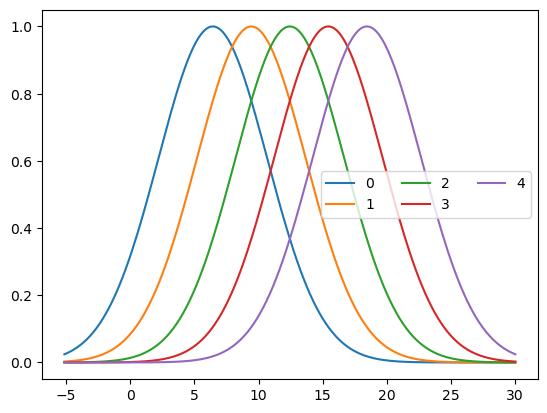

In [3]:
basis = bf.GaussianKernels(
    t_pre=5 * units.s,
    t_post=30 * units.s,
    t_delta=3 * units.s,
    t_std=3 * units.s,
)
hrf = basis(ts)

p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    p.plot(hrf.time, hrf[:, i_comp], label=comp)
p.legend(ncols=3)

<xarray.DataArray (time: 98, component: 1, chromo: 2)> Size: 2kB
0.0 0.0 0.0 0.0 0.0 0.0 ... 7.789e-06 8.836e-08 4.894e-06 5.155e-08 3.05e-06
Coordinates:
  * time       (time) float64 784B 0.0 0.125 0.25 0.375 ... 11.88 12.0 12.12
  * chromo     (chromo) <U3 24B 'HbO' 'HbR'
  * component  (component) <U5 20B 'gamma'

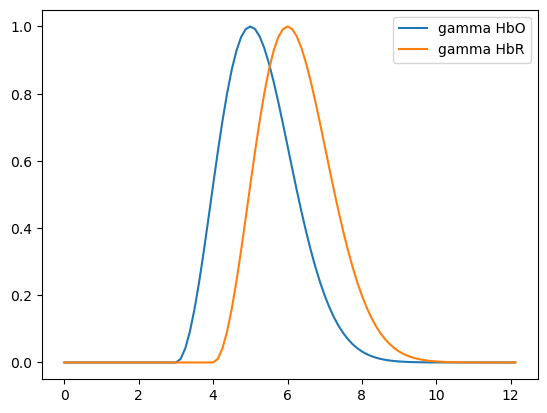

In [4]:
basis = bf.Gamma(
    tau={"HbO": 3 * units.s, "HbR": 4 * units.s},
    sigma=2 * units.s,
    T=0 * units.s,
)
hrf = basis(ts)
display(hrf)
p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(hrf.chromo.values):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()

<xarray.DataArray (time: 106, component: 1, chromo: 2)> Size: 2kB
0.0 0.0 0.0005512 0.0005512 0.00273 ... 4.08e-07 4.08e-07 2.491e-07 2.491e-07
Coordinates:
  * time       (time) float64 848B 0.0 0.125 0.25 0.375 ... 12.88 13.0 13.12
  * chromo     (chromo) <U3 24B 'HbO' 'HbR'
  * component  (component) <U5 20B 'gamma'

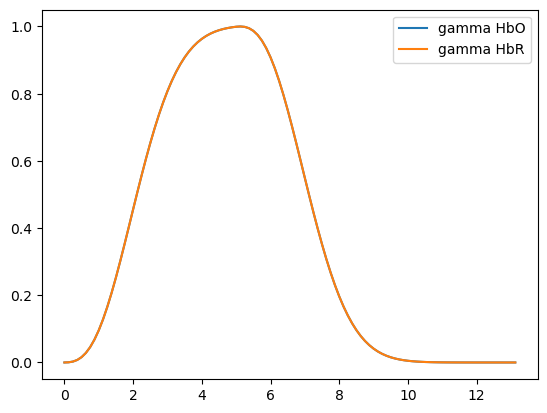

In [5]:
basis = bf.Gamma(
    tau=0 * units.s,
    sigma=2 * units.s,
    T=5 * units.s,
)
hrf = basis(ts)
display(hrf)
p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(hrf.chromo.values):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<xarray.DataArray (time: 121, component: 2, chromo: 2)> Size: 4kB
0.0 0.0 0.0 0.0 0.0 0.0 ... -7.624e-06 3.086e-07 3.086e-07 -2.978e-06 -2.978e-06
Coordinates:
  * time       (time) float64 968B 0.0 0.125 0.25 0.375 ... 14.75 14.88 15.0
  * chromo     (chromo) <U3 24B 'HbO' 'HbR'
  * component  (component) <U11 88B 'gamma' 'gamma_deriv'

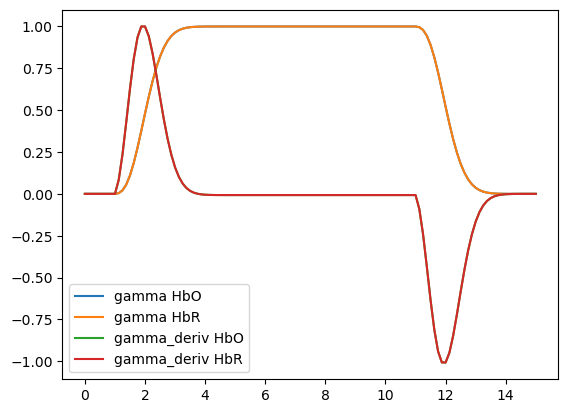

In [6]:
basis = bf.GammaDeriv(
    tau={"HbO": 1 * units.s, "HbR": 1 * units.s},
    sigma=1 * units.s,
    T=10 * units.s,
)
hrf = basis(ts)
display(hrf)
p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(hrf.chromo.values):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()

<xarray.DataArray (time: 111, component: 1, chromo: 2)> Size: 2kB
0.0 0.0 0.07252 2.416e-07 0.1583 ... 0.04492 6.747e-05 0.0404 5.685e-05 0.0363
Coordinates:
  * time       (time) float64 888B 0.0 0.125 0.25 0.375 ... 13.5 13.62 13.75
  * chromo     (chromo) <U3 24B 'HbO' 'HbR'
  * component  (component) <U10 40B 'afni_gamma'

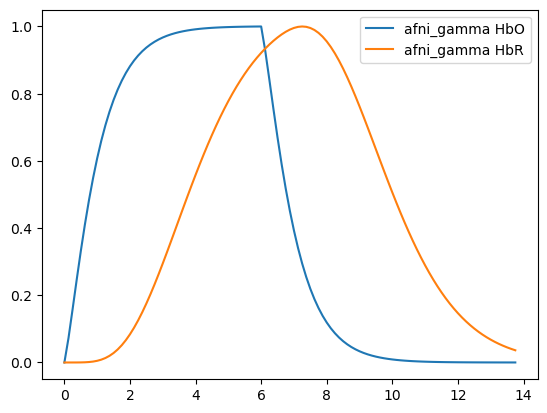

In [7]:
basis = bf.AFNIGamma(
    p={"HbO": 0.5, "HbR": 5},
    q=0.7 * units.s,
    T=6 * units.s,
)
hrf = basis(ts)
display(hrf)
p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(hrf.chromo.values):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo], label=f"{comp} {chromo}")

p.legend()

/home/thomas/anaconda3/envs/cedalion/lib/python3.10/site-packages/xarray/core/variable.py:306: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.asarray(data)


<xarray.DataArray (time: 50, component: 1, chromo: 2, channel: 10)> Size: 8kB
0.9965 0.5959 0.5071 0.7915 0.2028 0.804 ... 0.1243 0.5303 0.09658 0.8934 0.1092
Coordinates:
  * time       (time) float64 400B 0.0 0.125 0.25 0.375 ... 5.75 5.875 6.0 6.125
  * component  (component) <U10 40B 'individual'
  * chromo     (chromo) <U3 24B 'HbO' 'HbR'
  * channel    (channel) <U5 200B 'S1D1' 'S1D2' 'S1D3' ... 'S1D8' 'S1D9' 'S1D10'

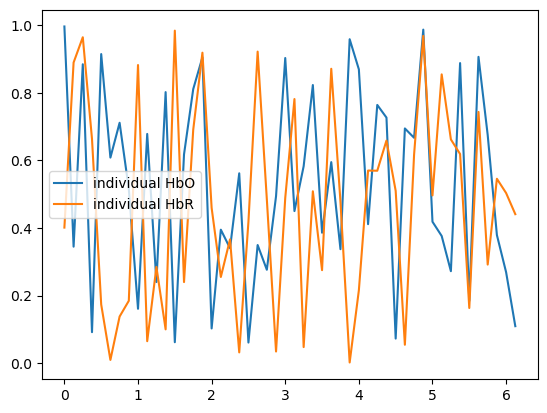

In [8]:
n_times = 100
n_channels = 10
n_other = 2

#params_basis = np.random.rand(n_times, n_channels, n_other)
params_basis = np.random.rand(n_times, n_other)

ts_basis = cdc.build_timeseries(
    np.random.random((50, 10, 2)),
    dims=["time", "channel", "chromo"],
    time=np.arange(50) / fs,
    channel=["S1D1", "S1D2", "S1D3", "S1D4", "S1D5", "S1D6", "S1D7", "S1D8", "S1D9", "S1D10"],
    value_units=units.uM,
    time_units=units.s,
    other_coords={'chromo' : ["HbO", "HbR"]}
)


basis = bf.IndividualBasis(ts_basis)

hrf = basis(ts)
display(hrf)
p.figure()
for i_comp, comp in enumerate(hrf.component.values):
    for i_chromo, chromo in enumerate(hrf.chromo.values):
        p.plot(hrf.time, hrf[:, i_comp, i_chromo,0], label=f"{comp} {chromo}")

p.legend()

In [9]:
elements = cedalion.datasets.get_fingertapping()
amp = elements[0].data[0]
geo3d = elements[0].geo3d
stim = elements[0].stim
stim.cd.rename_events({"1.0": "control", "2.0": "Tapping/Left", "3.0": "Tapping/Right"})

dpf = xr.DataArray([6, 6], dims="wavelength", coords={"wavelength" : amp.wavelength})
od = cedalion.nirs.int2od(amp)
conc = cedalion.nirs.od2conc(od, geo3d, dpf, "prahl")
conc.time.attrs["units"] = "s"

sel_stim = stim[stim.trial_type.isin(["Tapping/Left", "Tapping/Right"])]
sel_stim["duration"] = 20

AttributeError: 'DataArray' object has no attribute 'geo3d'

In [ ]:
sel_stim.head(5)

In [ ]:
regressors = dm.make_hrf_regressors(
    conc,
    sel_stim,
    basis_function=bf.GaussianKernels(
        t_pre=5 * units.s,
        t_post=30 * units.s,
        t_delta=1.5 * units.s,
        t_std=1.5 * units.s,
    ),
)
display(regressors)

p.figure()
for i_reg, reg in enumerate(regressors.regressor.values):
    for i_chromo, chromo in enumerate(regressors.chromo.values):
        p.plot(regressors.time, regressors[:, i_reg, i_chromo], label=f"{comp} {chromo}")

for i in sel_stim.onset:
    p.axvline(i)

p.xlim(200,300)



In [ ]:
regressors = dm.make_hrf_regressors(
    conc,
    sel_stim,
    basis_function=bf.Gamma(
        tau={"HbO": 0 * units.s, "HbR": 0 * units.s},
        sigma=5 * units.s,
        T=0 * units.s,
    ),
)
display(regressors)

p.figure()
for reg in regressors.regressor.values:
    for chromo in regressors.chromo.values:
        p.plot(
            regressors.time,
            regressors.sel(regressor=reg, chromo=chromo),
            label=f"{reg} {chromo}",
        )

for o, d in zip(sel_stim.onset, sel_stim.duration):
    p.axvline(o)
    p.axvline(o + d)

p.xlim(200, 300)
p.legend()